# Text Classification with Bag of words

Outline:
* Download and explore the data
* Apply text preprocessing techniques
* Implement the bag of words model
* Train ML models for text classification
* Make predictions and submit to kaggle

# Download and explore the deta

Outline:
* Download the dataset form Kaggle to colab
* Explore the data using pandas
* Create a small working sample

### Download the dataset form Kaggle to colab


In [ ]:
!ls .

kaggle.json  sample_data


In [ ]:
import os

In [ ]:
IS_KAGGLE = 'KAGGLE_KERNEL_RUN_TYPE' in os.environ

In [ ]:
if IS_KAGGLE:
   data_dir = '/kaggle/input/quora-insincere-questions-classification'
   train_fname = data_dir + '/train.csv'
   test_fname = data_dir + 'test.csv'
   sample_fname = data_dir + 'sample_submission.csv'
else:
  os.environ['KAGGLE_CONFIG_DIR'] ='.'
  !kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data
  !kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
  !kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data
  train_fname = '/content/data/train.csv.zip'
  test_fname = '/content/data/test.csv.zip'
  sample_fname = '/content/data/sample_submission.csv.zip'


 89% 49.0M/54.9M [00:01<00:00, 37.2MB/s]
100% 54.9M/54.9M [00:01<00:00, 39.5MB/s]
 57% 9.00M/15.8M [00:00<00:00, 27.9MB/s]
100% 15.8M/15.8M [00:00<00:00, 41.1MB/s]
  0% 0.00/4.09M [00:00<?, ?B/s]
100% 4.09M/4.09M [00:00<00:00, 84.9MB/s]


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] ='.'

In [ ]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data

test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data

sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


### Explore the data using pandas

In [ ]:
train_fname = '/content/data/train.csv.zip'
test_fname = '/content/data/test.csv.zip'
sample_fname = '/content/data/sample_submission.csv.zip'

In [ ]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv(train_fname)

In [ ]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [ ]:
sincere_df = raw_df[raw_df.target ==0]

In [ ]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [ ]:
insincere_df = raw_df[raw_df.target ==1]

In [ ]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [ ]:
raw_df.target.value_counts()

,count
target,
0,1225312
1,80810


In [ ]:
raw_df.target.value_counts(normalize=True)

,proportion
target,
0,0.93813
1,0.06187


<Axes: xlabel='target'>

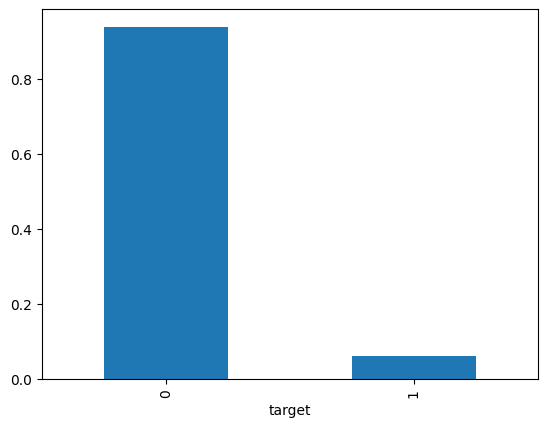

In [ ]:
import matplotlib.pyplot as plt

raw_df.target.value_counts(normalize=True).plot(kind='bar')

In [ ]:
test_df = pd.read_csv(test_fname)

In [ ]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [ ]:
insincere_df = raw_df[raw_df.target==1]

In [ ]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [ ]:
raw_df.target.value_counts()

,count
target,
0,1225312
1,80810


In [ ]:
raw_df.target.value_counts(normalize=True)

,proportion
target,
0,0.93813
1,0.06187


<Axes: xlabel='target'>

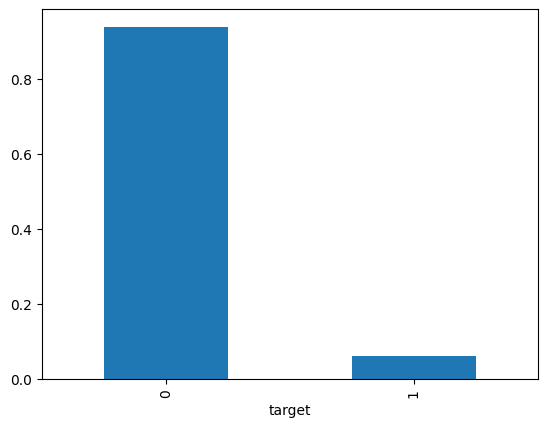

In [ ]:
raw_df.target.value_counts(normalize=True).plot(kind='bar')

In [ ]:
test_df = pd.read_csv(test_fname)

In [ ]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [ ]:
sub_df= pd.read_csv(sample_fname)
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [ ]:
sub_df.prediction.value_counts(normalize=False)

,count
prediction,
0,375806


### Create a small working sample

In [ ]:
SAMPLE_SIZE = 100_000
SAMPLE_SIZE

100000

In [ ]:
sample_df = raw_df.sample(SAMPLE_SIZE, random_state= 42)

In [ ]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


# text preprocessing techniques
Outline:

1. Understand the bag of words model
2. Toknization
3. Stop word removal
4. Stemming

### Bag of Words Intuition

1. Create a list of all the words across all the text documents
2. You convert each document into vector counts of each word


Limitations:
1. There may be too many words in the dataset
2. Some words may occur too frequently
3. Some words may occur very rarely or only once
4. A single word may have many forms (go, gone, going or bird vs. birds)

In [ ]:
q0 = sincere_df.question_text.values[1]

In [ ]:
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [ ]:
q1 = raw_df[raw_df.target == 1].question_text.values[0]
q1

'Has the United States become the largest dictatorship in the world?'

### Tokennization
splitting a document into word and separators

In [ ]:
import nltk

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [ ]:
word_tokenize(q0)

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [ ]:
q1

'Has the United States become the largest dictatorship in the world?'

In [ ]:
word_tokenize(q1)

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

In [ ]:
q0_tok = word_tokenize(q0)
q1_tok = word_tokenize(q1)

### stop Word Removl
Romoving commonly occuring words


In [ ]:
q1_tok

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
english_stopwords = stopwords.words('english')

In [ ]:
", ".join(english_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
def remove_stopwords(tokens):
  return[word for word in tokens if word.lower() not in english_stopwords]

In [ ]:
q0_tok

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [ ]:
q0_stp = remove_stopwords(q0_tok)

In [ ]:
q0_stp

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [ ]:
q1_stp = remove_stopwords(q1_tok)

In [ ]:
q1_tok

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

In [ ]:
q1_stp

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

### stemming
'go', 'gone', 'going'==>'go', 'brids, 'brid' '=>'brid'

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
stemmer = SnowballStemmer(language='english')

In [ ]:
stemmer.stem('going')

'go'

In [ ]:
stemmer.stem('supposedly')

'suppos'

In [ ]:
q0_stm = [stemmer.stem(word)for word in q0_stp]

In [ ]:
q0_stp

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [ ]:
q0_stm

['adopt', 'dog', ',', 'would', 'encourag', 'peopl', 'adopt', 'shop', '?']

In [ ]:
q1_stm = [stemmer.stem(word) for word in q1_stp]

In [ ]:
q1_stp

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

In [ ]:
q1_stm

['unit', 'state', 'becom', 'largest', 'dictatorship', 'world', '?']

### Lemmatization
"love" ->love
"loving"  ->love
"lovable"  ->love

## Bag  of Words Intuition
1. There may be too many words in the dataset
2. Some words may occur too frequently
3. Some words may occur very rarely or only once
4. A single word may have many forms (go, gone, going or bird vs. birds)

## Implement Bag of Words


Outline:

1. Create a vocabulary using Count Vectorizer
2. Transform text to vectors using Count Vectorizer
3. Configure text preprocessing in Count Vectorizer

### Create a vocabulary

In [ ]:
small_df = sample_df[:5]

In [ ]:
small_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0


In [ ]:
small_df.question_text.values

array(['What is the most effective classroom management skill/technique to create a good learning environment?',
       'Can I study abroad after 10th class from Bangladesh?',
       'How can I make friends as a college junior?',
       'How do I download free APK Minecraft: Pocket Edition for iOS (iPhone)?',
       'Like Kuvera, is "Groww" also a free online investment platform where I can invest in direct mutual funds?'],
      dtype=object)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
small_vect = CountVectorizer()

In [ ]:
small_vect.fit(small_df.question_text)

CountVectorizer()

In [ ]:
small_vect.get_feature_names_out()

array(['10th', 'abroad', 'after', 'also', 'apk', 'as', 'bangladesh',
       'can', 'class', 'classroom', 'college', 'create', 'direct', 'do',
       'download', 'edition', 'effective', 'environment', 'for', 'free',
       'friends', 'from', 'funds', 'good', 'groww', 'how', 'in', 'invest',
       'investment', 'ios', 'iphone', 'is', 'junior', 'kuvera',
       'learning', 'like', 'make', 'management', 'minecraft', 'most',
       'mutual', 'online', 'platform', 'pocket', 'skill', 'study',
       'technique', 'the', 'to', 'what', 'where'], dtype=object)

### Transform documents into Vectors

In [ ]:
small_df.question_text.values

array(['What is the most effective classroom management skill/technique to create a good learning environment?',
       'Can I study abroad after 10th class from Bangladesh?',
       'How can I make friends as a college junior?',
       'How do I download free APK Minecraft: Pocket Edition for iOS (iPhone)?',
       'Like Kuvera, is "Groww" also a free online investment platform where I can invest in direct mutual funds?'],
      dtype=object)

In [ ]:
vectors = small_vect.transform(small_df.question_text)

In [ ]:
vectors

<5x51 sparse matrix of type '<class 'numpy.int64'>'
	with 56 stored elements in Compressed Sparse Row format>

In [ ]:
vectors.shape

(5, 51)

In [ ]:
small_df.question_text.values[0]

'What is the most effective classroom management skill/technique to create a good learning environment?'

In [ ]:
vectors.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1]])

### configure Count Vectorizer Parameters

In [ ]:
stemmer = SnowballStemmer(language = 'english')

In [ ]:
def tokenize(text):
  return[word for word in word_tokenize(text) if word.lower() not in english_stopwords]


In [ ]:
tokenize ('what is the real (deal)here ?')

['real', '(', 'deal', ')', '?']

In [ ]:
vectorizer = CountVectorizer(lowercase=True,
                             tokenizer=tokenize,
                             stop_words=english_stopwords,
                             max_features = 1000)

In [ ]:
%%time
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


CPU times: user 19.6 s, sys: 111 ms, total: 19.7 s
Wall time: 20.3 s


CountVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7cae135363b0>)

In [ ]:
len(vectorizer.vocabulary_)

1000

In [ ]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'re", "'s", "'ve", '(', ')',
       '+', ',', '-', '.', '1', '10', '100', '11', '12', '12th', '15',
       '2', '20', '2017', '2018', '3', '30', '4', '5', '6', '7', '8', ':',
       ';', '?', '[', ']', '``', 'able', 'abroad', 'accept', 'access',
       'accomplishments', 'according', 'account', 'act', 'actually',
       'add', 'admission', 'adult', 'advanced', 'advantages', 'advice',
       'affect', 'africa', 'african', 'age', 'ago', 'air', 'allow',
       'allowed', 'almost', 'alone', 'along', 'already', 'also', 'always',
       'amazon', 'america', 'american', 'americans', 'among', 'amount',
       'analysis', 'ancient', 'android', 'animal', 'animals', 'anime',
       'another', 'answer', 'answers', 'anxiety', 'anyone', 'anything',
       'app', 'apple', 'application', 'apply', 'apps', 'area', 'army',
       'around', 'art', 'asian', 'ask', 'asked', 'attack'], dtype=object)

In [ ]:
%%time
inputs = vectorizer.transform(sample_df.question_text)

CPU times: user 19.8 s, sys: 77.2 ms, total: 19.9 s
Wall time: 21.5 s


In [ ]:
inputs.shape

(100000, 1000)

In [ ]:
inputs

<100000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 463305 stored elements in Compressed Sparse Row format>

In [ ]:
sample_df.question_text.values[0]

'What is the most effective classroom management skill/technique to create a good learning environment?'

In [ ]:
inputs[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [ ]:
%%time
test_inputs = vectorizer.transform(test_df.question_text)

CPU times: user 1min 12s, sys: 234 ms, total: 1min 12s
Wall time: 1min 13s


# ML Models for Text Classification

Outline :
* Create a Training  and Validation set
* Train e Logistic regression model
* Make prediction on training validation and test data


### Split into Training and Validation set

In [ ]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


In [ ]:
inputs.shape

(100000, 1000)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, sample_df.target, test_size=0.3, random_state=42)

In [ ]:
train_inputs.shape

(70000, 1000)

In [ ]:
train_targets.shape

(70000,)

In [ ]:
val_inputs.shape

(30000, 1000)

In [ ]:
val_targets.shape

(30000,)

### Train Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
MAX_ITER = 1000

In [ ]:
model =  LogisticRegression(max_iter = 1000, solver='sag')
model

LogisticRegression(max_iter=1000, solver='sag')

In [ ]:
%%time
model.fit(train_inputs,train_targets)

CPU times: user 23.3 s, sys: 23.7 ms, total: 23.3 s
Wall time: 23.5 s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='sag')

In [ ]:
train_preds = model.predict(train_inputs)

In [ ]:
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pd.Series(train_preds).value_counts()

,count
0,68211
1,1789


<Axes: >

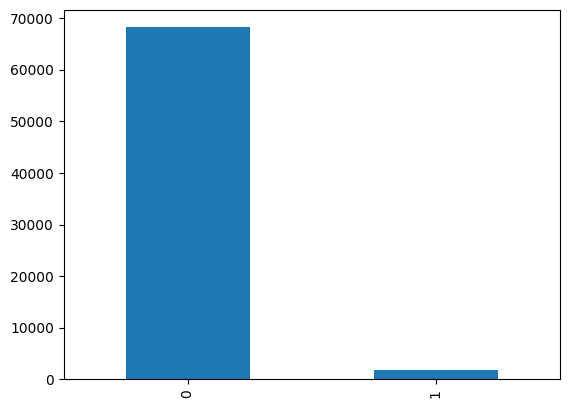

In [ ]:
pd.Series(train_preds).value_counts().plot(kind='bar')

In [ ]:
pd.Series(train_targets).value_counts()

,count
target,
0,65784
1,4216


<Axes: xlabel='target'>

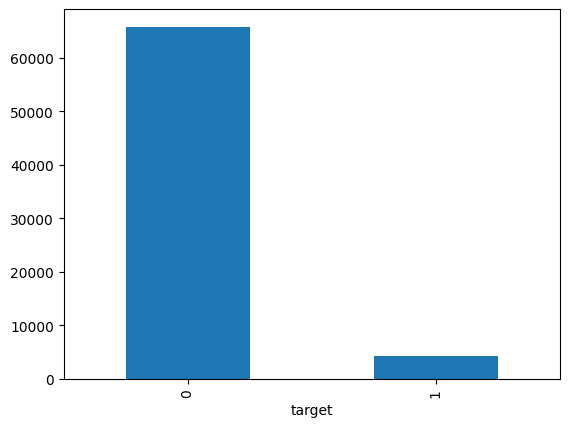

In [ ]:
pd.Series(train_targets).value_counts().plot(kind='bar')

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets, train_preds)

0.9473

In [ ]:
import numpy as np

In [ ]:
accuracy_score(train_targets, np.zeros(len(train_targets)))

0.9397714285714286

In [ ]:
accuracy_score(train_targets, np.ones(len(train_targets)))

0.06022857142857143

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(train_targets,train_preds)

0.38567860116569525

In [ ]:
f1_score(train_targets,np.zeros(len(train_targets)))

0.0

In [ ]:
random_preds = np.random.choice((0,1),len(train_targets))
f1_score(train_targets, random_preds)

0.10860261896830074

In [ ]:
val_preds = model.predict(val_inputs)
val_preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(val_targets, val_preds)

0.9447666666666666

In [ ]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [ ]:
sincere_df.target.values[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
model.predict(vectorizer.transform(sincere_df.question_text.values[:10]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
f1_score(val_targets, val_preds)

0.35849787069299266

In [ ]:
insincere_df.target.values[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
model.predict(vectorizer.transform(insincere_df.question_text.values[:10]))

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

# Make predictions and submit to kaggle

In [ ]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [ ]:
test_inputs.shape

(375806, 1000)

In [ ]:
test_preds =model.predict(test_inputs)

In [ ]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [ ]:
sub_df.prediction = test_preds

In [ ]:
sub_df.prediction.value_counts()

,count
prediction,
0,366383
1,9423


In [ ]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [ ]:
sub_df.to_csv('submission.csv', index=None)

In [ ]:
!head submission.csv

qid,prediction
0000163e3ea7c7a74cd7,0
00002bd4fb5d505b9161,0
00007756b4a147d2b0b3,0
000086e4b7e1c7146103,0
0000c4c3fbe8785a3090,0
000101884c19f3515c1a,0
00010f62537781f44a47,0
00012afbd27452239059,0
00014894849d00ba98a9,0
